## Importing Necessary Libraries

In [238]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.model_selection

### Reading the cleaned data set

In [239]:
df =pd.read_csv('C:\Users\Mike\Cervical_Cancer_Risk_Cleaned.csv')

In [240]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
2,2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
3,3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
4,4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0


**Dropping unnamed column**

In [241]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

### Spliting the data in two parts (train and test), fitting the model and implementing accuracy test

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the data into a training and test set.
X = df.drop('Dx:Cancer', axis =1).values
y = df['Dx:Cancer'].values
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, train_size = 0.75, random_state=10, stratify = y)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print ('Train data set accuracy score  : {0:.3f}'. format(accuracy_score(clf.predict(Xlr), ylr)))
print('Test data set accuracy score   : {0:.3f}'. format(accuracy_score(clf.predict(Xtestlr), ytestlr)))

Train data set accuracy score  : 0.995
Test data set accuracy score   : 0.986


**Data imbalance occurs when the sample size in the data classes are unevenly distributed as such in our data set. Most standard machine learning algorithms work well with balanced training data but they face challenges when the dataset classes are imbalanced. In such situation, classification methods tend to be biased towards the majority class. These algorithms are inefficient in this case mainly because they seek to maximize a measure of performance such as accuracy which is no longer a proper measure for imbalanced data. Accuracy treats equally the correctly and incorrectly classified examples of different data classes. For example, consider a data set that has 10% positive class and 90% negative class. A naif classifier that always outputs the majority class label will have a high accuracy of around 0.90. As the data imbalance is more pronounced, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class.**

**Train Classification Report**

In [243]:
from sklearn.metrics import classification_report
print(classification_report(ylr, clf.predict(Xlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       630
          1       1.00      0.77      0.87        13

avg / total       1.00      1.00      1.00       643



**The train classification report shows that, our model predicts the non-cancer patients correctly with 100% accuracy. But the model predicts 10 patients out of 13 patients are predicted correctly as cancer with %77 accuracy but model misses 3 patients.**

**Test Classification Report**

In [244]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       210
          1       1.00      0.40      0.57         5

avg / total       0.99      0.99      0.98       215



**The test classification report shows that our model predicts the non-cancer patients correctly with %99 accuracy. But the model predicts 2 out of 5 patients correctly as cancer but misses 3 patients. We will apply KFold Cross Validation to get more stable accuracy.**  

### Applying KFold cross-validation

In [245]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    scores = []
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 10 times
        clf.fit(x[train], y[train]) # fit
        score = score_func(clf.predict(x[test]), y[test])
        scores.append(score)
        result += score # evaluate score function on held-out data
    return result / nfold, scores # average and the list of the scores

In [246]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

(0.98603439922480618, [1.0, 0.96899224806201545, 0.96899224806201545, 0.9921875, 1.0])


### Applying Random Forest Classifier

In order to increase the prediction accuracy of the model, we applied Random Forest Classifier.

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=400)
clf.fit(Xlr, ylr)
predictions = clf.predict( Xtestlr)
print (classification_report(ytestlr, predictions, target_names=['0', '1'], digits = 3))

             precision    recall  f1-score   support

          0      0.986     1.000     0.993       210
          1      1.000     0.400     0.571         5

avg / total      0.986     0.986     0.983       215



In [248]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(ytestlr, predictions))

[[210   0]
 [  3   2]]


**After applying Random Forest classifier, there is almost no changing of correct prediction of our model. Model still predicts Cancer patients with %40 accuracy.In order to increase prediction accuracy we will apply SMOTE to increase Cancer samples in our train set and after fitting our model to train set, we will get the correct prediction proportion of test set.**

### 1. Synthetic Minority Oversampling Technique (SMOTE)

The former approach re-balances the class distribution by either oversampling the minority class or undersampling the majority class or by combing the two. The later approach seeks to learn more from the minority class by setting a high cost to the misclassification of this class. 

In [249]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(Xlr, ylr)
print('Resampled dataset shape {}'.format(Counter(y_res)))
print (X_res.shape)
print (y_res.shape)

Resampled dataset shape Counter({0: 630, 1: 630})
(1260L, 63L)
(1260L,)


**This is the new feature matrix which has 1260 data points and 63 features as X_res and the new response vector which has 1260 data points and 1 feature as y_res.**

In [250]:
clf = LogisticRegression()
clf.fit(X_res, y_res)
# Print the accuracy from the training and testing data.
print ('Train data set accuracy score  : {0:.3f}'. format(accuracy_score(clf.predict(X_res), y_res)))
print('Test data set accuracy score   : {0:.3f}'. format(accuracy_score(clf.predict(Xtestlr), ytestlr)))

Train data set accuracy score  : 0.999
Test data set accuracy score   : 0.991


**After implementing SMOTE, we got the test classification report**

In [251]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1'], digits =3))

             precision    recall  f1-score   support

          0      0.995     0.995     0.995       210
          1      0.800     0.800     0.800         5

avg / total      0.991     0.991     0.991       215



**After implementing SMOTE, test set classification report is obtained as written above. Now our model predicts Cancer patients with %80 accuracy which means that SMOTE increased our models correct prediction ability almost 2 times.**

### Now we will apply Random Forest Classifier after SMOTE

### Random Forest Classifier

In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_res, y_res)
predictions = clf.predict( Xtestlr)
print (classification_report(ytestlr, predictions, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       210
          1       1.00      0.80      0.89         5

avg / total       1.00      1.00      1.00       215



In [253]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytestlr, predictions)

array([[210,   0],
       [  1,   4]], dtype=int64)

**1. Cervical Cancer Risk Data set is pretty imbalanced since Dx:Cancer(response vector) consists of 1 and 0 which have a  18/840 proportion. After splitting out the data set two parts with the .25/.75 proportion and applying Logistic Regression model. We found out that our model was predicting Nan-cancer patients with %99 accuracy which was expected. But for the cancer patients model could not get the same accuracy results and 2 patients out of 5 patients were correctly predicted as cancer but 3 patients were missed. As seen, there were only 5 cancer patients in the test set which did not allow the model to predict more accurate.**

**2. After appling the KFold Cross Validation with n = 5 Kfold and got 0.986 accuracy score.**

**3. Then once we applied Random Forest Classifier to increase the prediction of our model. But precision and recall did not change.We still had %40 accuracy prediction for the Cancer patients, our model missed 3 patients out of 5.** 

**4. In order to increase 1 (positive) samples in Dx:Cancer to get more accurate prediction model, we applied Synthetic Minority Oversampling Technique(SMOTE) to the train set and created 1260 (consisting of equal positive and negative samples) data points. Then we applied Logistic Regression and Random Forest Classifier to increase the accuracy of prediction. This time our model started to predict Cancer patients with %80 accuracy and only 1 out of 5 patient is missed by model.**

**5. Since we do not have enough positive sample in our data set, only 18, we will twick with the train and test set proportion to get more accurate model. We will give test set more positive (1) samples and apply SMOTE to train set to get better prediction.** 

## Changing train and test data sets proportion and applying the same models to get more accurate predictions

** Train and Test Proportion is 60/40**

In [254]:
# Split the data into a training and test set.
X = df.drop('Dx:Cancer', axis =1).values
y = df['Dx:Cancer'].values
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, train_size = 0.60, random_state=10, stratify = y)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print ('Train data set accuracy score  : {0:.3f}'. format(accuracy_score(clf.predict(Xlr), ylr)))
print('Test data set accuracy score   : {0:.3f}'. format(accuracy_score(clf.predict(Xtestlr), ytestlr)))

Train data set accuracy score  : 0.994
Test data set accuracy score   : 0.985


**We almost get the same accuracy  results**

In [255]:
print (classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       337
          1       1.00      0.29      0.44         7

avg / total       0.99      0.99      0.98       344



In [256]:
print (confusion_matrix(ytestlr, clf.predict(Xtestlr)))

[[337   0]
 [  5   2]]


**After applying the classification report to test data set, the accuracy of predicting Cancer Patients get extremely low. Which means that only 2 patients out of 7 are predicted as cancer. So the model misses 5 patients. In order to increase the accuracy of prediction we will apply Random Forest Classifier.**

Previous recall:%40

Current recall :%29

**Our model predicts Cancer Patients with %29 accuracy comperatively worse than our previous model.**

### Random Forest Classifier

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=400)
clf.fit(Xlr, ylr)
predictions = clf.predict( Xtestlr)
print (classification_report(ytestlr, predictions, target_names=['0', '1'], digits = 3))

             precision    recall  f1-score   support

          0      0.991     1.000     0.996       337
          1      1.000     0.571     0.727         7

avg / total      0.991     0.991     0.990       344



In [258]:
print (confusion_matrix(ytestlr, clf.predict(Xtestlr)))

[[337   0]
 [  3   4]]


**After applying Random Forest Classifier, our model predicted Non-Cancer Patients with %99.1 accuracy. For Cancer patients the prediction accuracy of the model almost increased double and 4 out of 7 patients predicted correctly as cancer. However since the model produces satisfactory results, we are going to apply SMOTE.**

**Recall increased almost double from %29 to %57.**

### SMOTE

In [259]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(Xlr, ylr)
print('Resampled dataset shape {}'.format(Counter(y_res)))
print (X_res.shape)
print (y_res.shape)

Resampled dataset shape Counter({0: 503, 1: 503})
(1006L, 63L)
(1006L,)


In [260]:
clf = LogisticRegression()
clf.fit(X_res, y_res)
# Print the accuracy from the training and testing data.
print ('Train data set accuracy score  : {0:.3f}'. format(accuracy_score(clf.predict(X_res), y_res)))
print('Test data set accuracy score   : {0:.3f}'. format(accuracy_score(clf.predict(Xtestlr), ytestlr)))

Train data set accuracy score  : 0.999
Test data set accuracy score   : 0.994


In [261]:
print(classification_report(ytestlr, clf.predict(Xtestlr), target_names=['0','1'], digits =3))

             precision    recall  f1-score   support

          0      0.997     0.997     0.997       337
          1      0.857     0.857     0.857         7

avg / total      0.994     0.994     0.994       344



**After applying SMOTE and then fitting our model, recall increased upto %86 with prediction of 6 patients correctly as Cancer.** 

In [262]:
print (confusion_matrix(ytestlr, clf.predict(Xtestlr)))

[[336   1]
 [  1   6]]


In [263]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=400)
clf.fit(X_res, y_res)
predictions = clf.predict( Xtestlr)
print (classification_report(ytestlr, predictions, target_names=['0', '1'], digits = 3))

             precision    recall  f1-score   support

          0      0.997     1.000     0.999       337
          1      1.000     0.857     0.923         7

avg / total      0.997     0.997     0.997       344



In [264]:
print (confusion_matrix(ytestlr, clf.predict(Xtestlr)))

[[337   0]
 [  1   6]]


**After changing the proportion of Train and Test Set, our model's prediction accuracy almost increased upto %6 and 6 out of 7 patients are also predicted as Cancer correctly. If we had more Cancer patient samples in data set, we would have train our model better and get more accurate predictions.To said that we would advise the customer to get more Cancer samples to have better predictions.**

### Most Important Features In Our Model

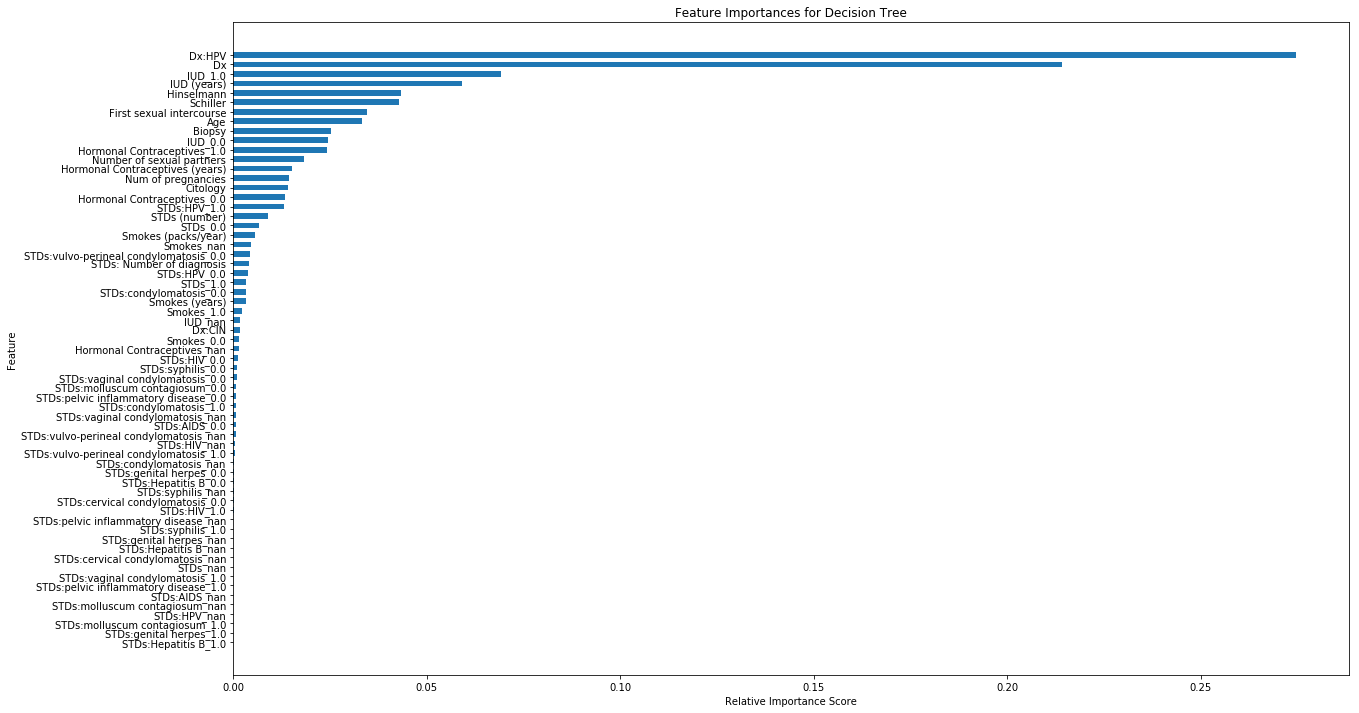

In [265]:
plt.figure(figsize = (20,12))
model_feature_names = df.drop('Dx:Cancer', axis =1).columns
feature_importances = clf.feature_importances_
feature_names, feature_scores = zip(*sorted(zip(model_feature_names, feature_importances), key=lambda x: x[1]))
y_position = list(range(len(feature_names)))
plt.barh(y_position, feature_scores, height=0.6, align='center')
plt.yticks(y_position , feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')